# Кросс-валидация

# Задания для выполнения

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Загрузите датасет ирисы Фишера из библиотеки sklearn.datasets.

In [49]:
from sklearn.datasets import load_iris

iris = load_iris()
X=iris.data
y=iris.target

In [50]:
iris_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
name_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2:'Iris-virginica'}
iris_data['class'] = [name_map[k] for k in iris['target']]
iris_data.head(10)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

         class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  
5  Iris-setosa  
6  Iris-setosa  
7  Iris-setosa  
8  Iris-setosa  
9  Iris-setosa

### 2. Сделайте hold-out разбиение данных. Для этого разделите данные на обучающую и валидационную выборки и выведите на экран соответствующие индексы разбиения.

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)


In [52]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.8260869565217391
0.7999999999999999


<Axes: >

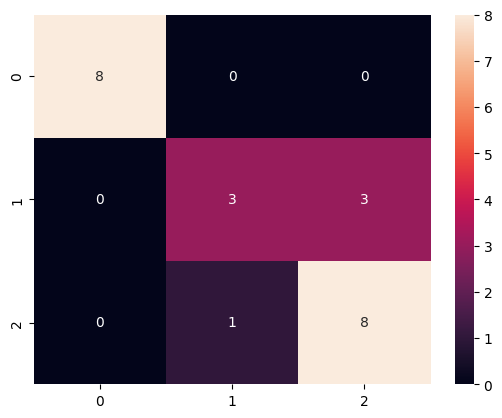

In [53]:
from sklearn.metrics import confusion_matrix


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

1.0
1.0


<Axes: >

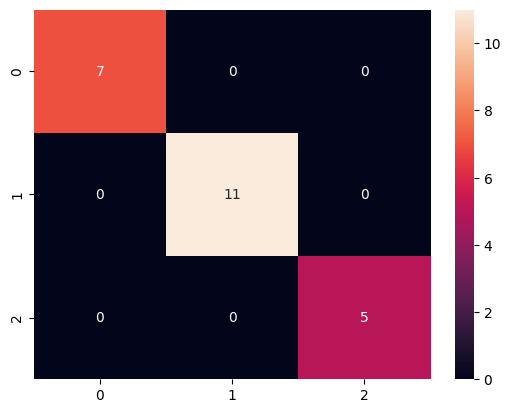

In [55]:
from sklearn.metrics import confusion_matrix


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.8695652173913043
0.8745098039215686


<Axes: >

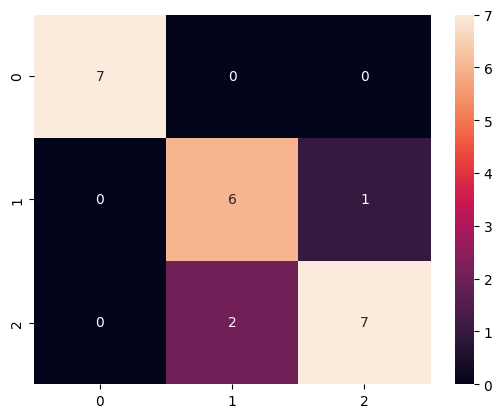

In [57]:
from sklearn.metrics import confusion_matrix


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

### 3. Теперь сделайте разбиение перемешанных данных, зафиксировав воспроизводимость выбора данных после перемешивания, указав значение параметра random_state=42 и выведите на экран соответствующие индексы разбиения.

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=42)

print(f"Train indices: {X_train.shape[0]}, Validation indices: {X_valid.shape[0]}")

Train indices: 90, Validation indices: 60


### 4. Обучите модель логистической регрессии на обучающих данных. Выведите значения коэффициентов модели, полученных в результате обучения. Сделайте предсказание на тестовом наборе признаков. Выведите значение метрик accuracy и f1-score.

In [59]:
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.9130434782608695
0.9153439153439153


<Axes: >

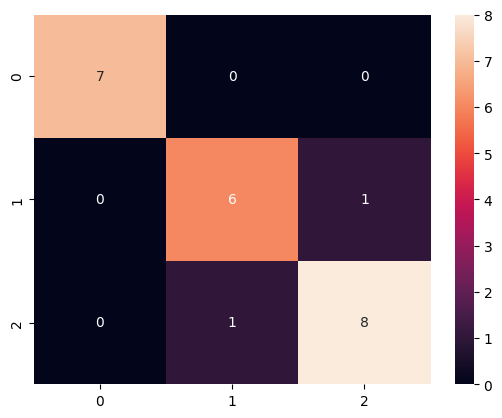

In [60]:
from sklearn.metrics import confusion_matrix


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.9130434782608695
0.9153439153439153


И в этом и в прошлом случае модель показывает идеальные метрики 

In [62]:
from sklearn.model_selection import KFold,StratifiedKFold,LeaveOneOut, cross_val_score

### 6. Теперь сделайте k-блочную перекрёстную проверку модели (кросс-валидацию). Сравните полученные метрики с метриками, которые были при hold-out разбиении.

In [63]:
kf = KFold(n_splits = 3, shuffle=True, random_state=42)
kf

KFold(n_splits=3, random_state=42, shuffle=True)

In [64]:
for i, (train_index, test_index) in enumerate(kf.split(y)):
    print("Fold {}: Длинна train: {}, Длинна test: {}".format(i+1, len(train_index), len(test_index)))
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1: Длинна train: 100, Длинна test: 50
Train: index=[  0   1   2   3   5   6   7   8  13  14  17  20  21  23  24  25  28  33
  34  35  37  38  39  40  41  43  44  46  47  48  49  50  52  53  54  57
  58  59  60  61  62  63  66  67  70  71  72  74  77  79  80  83  84  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 105 106
 107 111 112 113 114 115 116 117 119 120 121 122 123 124 125 126 129 130
 134 135 136 138 139 140 144 147 148 149]
 Test:  index=[  4   9  10  11  12  15  16  18  19  22  26  27  29  30  31  32  36  42
  45  51  55  56  64  65  68  69  73  75  76  78  81  82  85  86 104 108
 109 110 118 127 128 131 132 133 137 141 142 143 145 146]
Fold 2: Длинна train: 100, Длинна test: 50
Train: index=[  1   2   3   4   6   9  10  11  12  14  15  16  17  18  19  20  21  22
  26  27  29  30  31  32  36  37  38  41  42  45  46  48  50  51  52  54
  55  56  57  58  59  61  63  64  65  68  69  71  72  73  74  75  76  78
  79  81  82  85  86  87  88  90  91  92  99

In [65]:
metrics_accuracy = []
metrics_f1 = []
model = LogisticRegression(solver='liblinear')
for i, (train_index, test_index) in enumerate(kf.split(y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics_accuracy.append(accuracy_score(y_test, y_pred))
    metrics_f1.append(f1_score(y_test, y_pred, average='macro'))

In [66]:
print('Значения метрики accuracy: {} \nЗначения метрики f1: {}'.format(metrics_accuracy, metrics_f1))

Значения метрики accuracy: [1.0, 0.92, 1.0] 
Значения метрики f1: [1.0, 0.9163398692810457, 1.0]


In [67]:
import numpy as np
print("Среднее по кросс-валидации: ", np.array(metrics_f1).mean())

Среднее по кросс-валидации:  0.9721132897603485


В данном случае метрики не идеальны, но все равно очень хорошие

### 7. Теперь сделайте ту же самую перекрёстную проверку модели, используя библиотечную функцию cross_val_score. Убедитесь, что получится тот же результат.

In [68]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = kf,                # тип разбиения (можно указать просто число фолдов cv = 3)
                             scoring = 'accuracy',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

Кросс-валидация:  [1.   0.92 1.  ]
Среднее по кросс-валидации:  0.9733333333333333
Дисперсия по кросс-валидации:  0.03771236166328251


### 8. Теперь сделайте k-блочную перекрёстную проверку модели (кросс-валидацию) со стратификацией. Проделайте всё тоже самое, что и в предыдущем пункте.

In [69]:
skf = StratifiedKFold(n_splits=3,shuffle=True, random_state=42)
skf.get_n_splits(X, y)

3

In [70]:
for i, (train_index, test_index) in enumerate(skf.split(X,y)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  1   2   3   4   5   6   7   8   9  12  16  17  18  22  23  24  26  27
  28  30  32  34  36  37  38  39  41  42  43  44  46  48  49  50  51  53
  54  55  56  57  60  61  62  63  64  66  67  69  70  71  72  73  76  77
  79  81  82  83  84  86  88  91  93  95  96  98 101 103 104 105 106 108
 110 113 115 116 117 118 119 122 123 125 126 127 128 129 131 132 133 134
 135 137 140 141 142 143 145 146 147 149]
 Test:  index=[  0  10  11  13  14  15  19  20  21  25  29  31  33  35  40  45  47  52
  58  59  65  68  74  75  78  80  85  87  89  90  92  94  97  99 100 102
 107 109 111 112 114 120 121 124 130 136 138 139 144 148]
Fold 2:
Train: index=[  0   1   3   5  10  11  12  13  14  15  16  17  18  19  20  21  23  25
  26  29  31  32  33  35  36  37  39  40  43  45  46  47  49  51  52  53
  54  55  57  58  59  62  63  65  68  73  74  75  76  77  78  79  80  81
  84  85  86  87  88  89  90  91  92  93  94  97  99 100 101 102 103 107
 109 111 112 113 114 115 117 119 120 121 

In [71]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = skf,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1.         0.91851852 0.96078431]
Среднее по кросс-валидации:  0.959767610748003


### 9. Теперь сделайте перекрёстную проверку, изпользуя leave-one-out разбиение. Проделайте всё тоже самое, что и в предыдущем пункте.

In [72]:
loo = LeaveOneOut()

for i, (train_index, test_index) in enumerate(loo.split(X)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = loo,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Fold 1:
Train: index=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149]
 Test:  index=[0]
Fold 2:
Train: index=[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  

# Контрольные вопросы

### Зачем нужно применять кросс-валидацию?
Кросс-валидация позволяет оценить стабильность и обобщающие способности модели, минимизируя зависимость от конкретного разделения данных.

### В чём заключается процесс кросс-валидации?
Данные разделяются на несколько частей, и модель обучается на части данных, а тестируется на другой, повторяя этот процесс несколько раз.

### В чем достоинства и недостатки каждого метода кросс-валидации?
- **K-fold**: Баланс между временем и оценкой. Недостаток — может быть медленно для больших данных.
- **Leave-One-Out (LOO)**: Точная оценка, но высокая вычислительная нагрузка.
- **Stratified**: Лучше для несбалансированных классов, но может быть менее точной для малых выборок.

### Какой метод кросс-валидации можно применять на данных с большим дисбалансом классов?
Использовать **stratified k-fold**, чтобы каждый фолд содержал пропорции классов, аналогичные исходному набору данных.

### Можно ли бороться с недообучением при помощи кросс-валидации? А с переобучением?
Кросс-валидация помогает выявить переобучение, но не может решить проблему недообучения. Переобучение можно уменьшить с помощью регуляризации.

### Какие основные типы разбиений данных используются при кросс-валидации?
Основные типы: **k-fold**, **stratified k-fold**, **Leave-One-Out**, **hold-out**.

### Какой тип кросс-валидации можно применять если нужно сделать очень большое количество проходов?
**Leave-One-Out (LOO)**, так как позволяет выполнить один проход для каждого экземпляра, но требует много вычислений.


# Дополнительные задания

### 1. Изучите разбиение Leave-P-Out. Продемонстрируйте работу этого алгоритма на примере из лабораторной работы.

In [74]:
from sklearn.model_selection import LeavePOut, cross_val_score

p = 2 
loo = LeavePOut(p)

for i, (train_index, test_index) in enumerate(loo.split(X)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

cv_results = cross_val_score(model, X, y, cv=loo, scoring='f1_macro', n_jobs=-1)
print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())


Fold 1:
Train: index=[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149]
 Test:  index=[0 1]
Fold 2:
Train: index=[  1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84

### 2. Изучите функцию cross_validate(). Продемонстрируйте работу этой функции на тех же данных.

In [81]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)

cv_results = cross_validate(model, X, y, cv=5, scoring='f1_macro', return_train_score=True)

print("Результаты кросс-валидации: ", cv_results)
print("Средний F1-макро: ", cv_results['test_score'].mean())
print("Средний тренировки: ", cv_results['train_score'].mean())

Результаты кросс-валидации:  {'fit_time': array([0.00460172, 0.00604367, 0.00371695, 0.00381684, 0.00367665]), 'score_time': array([0.00071788, 0.00052142, 0.00038528, 0.00038171, 0.00037718]), 'test_score': array([0.96658312, 1.        , 0.93265993, 0.96658312, 1.        ]), 'train_score': array([0.96664582, 0.96664582, 0.98333333, 0.98332291, 0.97499609])}
Средний F1-макро:  0.973165236323131
Средний тренировки:  0.9749887954467559


### 3. Оцените при помощи кросс-валидации другие метрики эффективности для этой же модели.

In [82]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)

cv_results = cross_validate(model, X, y, cv=5, 
                            scoring=['accuracy', 'precision_macro', 'recall_macro'], 
                            return_train_score=True)

print("Результаты кросс-валидации: ", cv_results)
print("Средняя точность: ", cv_results['test_accuracy'].mean())
print("Средняя точность (precision): ", cv_results['test_precision_macro'].mean())
print("Средняя полнота (recall): ", cv_results['test_recall_macro'].mean())


Результаты кросс-валидации:  {'fit_time': array([0.00424218, 0.00487542, 0.00382328, 0.00380945, 0.00365639]), 'score_time': array([0.00106478, 0.00090194, 0.00076747, 0.00072575, 0.00071645]), 'test_accuracy': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]), 'train_accuracy': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ]), 'test_precision_macro': array([0.96969697, 1.        , 0.94444444, 0.96969697, 1.        ]), 'train_precision_macro': array([0.96741855, 0.96741855, 0.98333333, 0.98412698, 0.97519283]), 'test_recall_macro': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]), 'train_recall_macro': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}
Средняя точность:  0.9733333333333334
Средняя точность (precision):  0.9767676767676768
Средняя полнота (recall):  0.9733333333333334


### 4. Сравните кросс-валидированные результаты работы нескольких моделей на одних и тех же данных.

In [83]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = [LogisticRegression(max_iter=10000), SVC(), RandomForestClassifier()]
model_names = ["Logistic Regression", "SVC", "Random Forest"]

for model, name in zip(models, model_names):
    cv_results = cross_validate(model, X, y, cv=5, 
                                scoring=['accuracy', 'precision_macro', 'recall_macro'],
                                return_train_score=True)
    print(f"{name} - Точность: {cv_results['test_accuracy'].mean():.3f}, Precision: {cv_results['test_precision_macro'].mean():.3f}, Recall: {cv_results['test_recall_macro'].mean():.3f}")


Logistic Regression - Точность: 0.973, Precision: 0.977, Recall: 0.973
SVC - Точность: 0.967, Precision: 0.968, Recall: 0.967
Random Forest - Точность: 0.960, Precision: 0.963, Recall: 0.960


### 5. Повторите анализ на другом датасете: встроенном наборе данных о диабете.

In [91]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target


y = pd.Series(y)
y = (y > y.median()).astype(int).values.ravel()

models = [LogisticRegression(max_iter=10000), SVC(), RandomForestClassifier()]
model_names = ["Logistic Regression", "SVC", "Random Forest"]

for model, name in zip(models, model_names):
    cv_results = cross_validate(model, X, y, cv=5, 
                                scoring=['accuracy', 'precision_macro', 'recall_macro'],
                                return_train_score=True)
    print(f"{name} - Точность: {cv_results['test_accuracy'].mean():.3f}, Precision: {cv_results['test_precision_macro'].mean():.3f}, Recall: {cv_results['test_recall_macro'].mean():.3f}")


Logistic Regression - Точность: 0.742, Precision: 0.747, Recall: 0.742
SVC - Точность: 0.728, Precision: 0.732, Recall: 0.729
Random Forest - Точность: 0.708, Precision: 0.716, Recall: 0.709


### 6. Сделайте k-блочную перекрёстную проверку (KFold) модели логистической регрессии, предварительно стандартизировав данные. Для этого создайте конвейер с помощью make_pipeline из библиотеки sklearn.pipeline, который будет стандартизировать, а затем выполнять логистическую регрессию.

In [94]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

y = pd.Series(y)
y = (y > y.median()).astype(int) 

pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000))

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')

print(f"Средняя точность по кросс-валидации: {cv_results.mean():.3f}")


Средняя точность по кросс-валидации: 0.737
